In [18]:
import sklearn
import pandas as pd
import numpy as np

# Get the Dataset using Sklearn-Datasets
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

x = mnist.data
y = mnist.target



In [5]:
# 70000 total images
x.shape

(70000, 784)

In [6]:
# 70000 corresponding labels for images
y.shape

(70000,)

In [14]:
import matplotlib.pyplot as plt
import matplotlib

In [20]:
# checking some images randonmly by accessing a row of dataframe and then converting that row to an image
somedigit = x[12].reshape(28, 28) 

In [21]:
somedigit.shape

(28, 28)

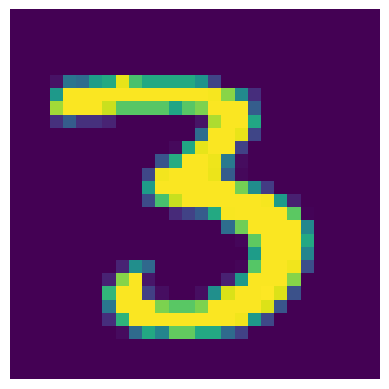

In [25]:
plt.imshow(somedigit, interpolation = 'nearest')
plt.axis("off")
plt.show()

In [26]:
# Now doing SVD we can take an image to start and getting intuition

U, Sigma, V = np.linalg.svd(somedigit)

In [27]:
Λ = np.diag(Sigma)

print(U.shape, Λ.shape, V.shape)

(28, 28) (28, 28) (28, 28)


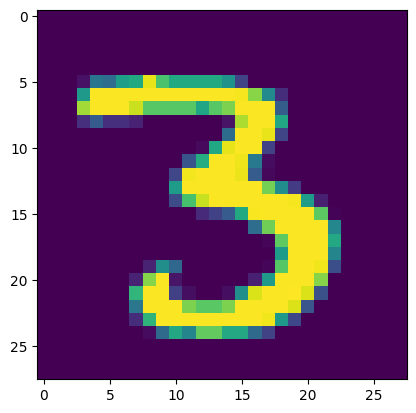

In [29]:
image_recon = U.dot(Λ).dot(V)
plt.imshow(image_recon, interpolation= 'nearest')

In [30]:
#  Now lets' do svd1
svd1 = np.outer(U[:,0], V[0,:])*Sigma[0]

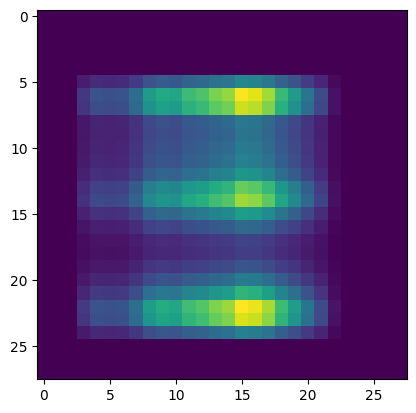

In [31]:
plt.imshow(svd1, interpolation='nearest')

In [32]:
# svd2
svd2 = np.outer(U[:,1], V[1,:])*Sigma[1]

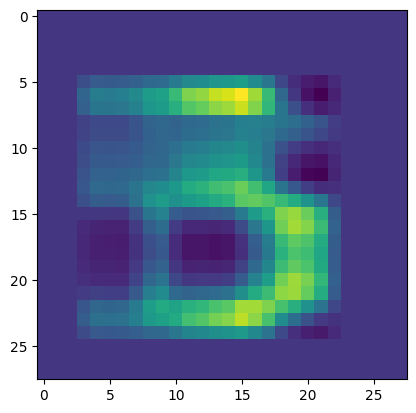

In [33]:
plt.imshow(svd1+svd2, interpolation= 'nearest')


In [34]:
svdlto10= U[:, 0:10].dot(Λ[0:10,0:10]).dot(V[0:10, : ])

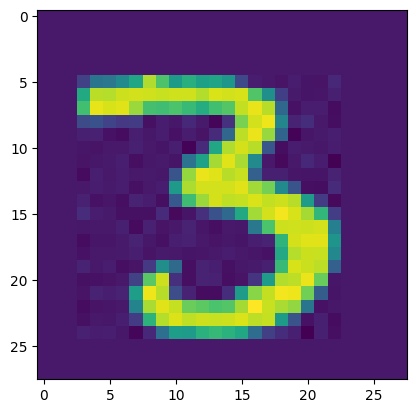

In [35]:
plt.imshow(svdlto10, interpolation='nearest')

In [36]:
# now let's do svd for 1000 images you can take your desrired number of images

imagemat=x.T
imagemat.shape

(784, 70000)

In [48]:
imagemat_sample = imagemat[:,1 :1000]

U, Sigma, V = np.linalg.svd(imagemat_sample)

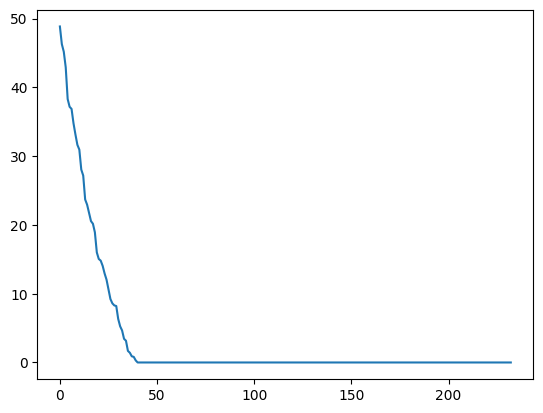

In [50]:
plt.plot(Sigma[550:-1])


Now we will do this for Eigen Faces

In [61]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [ ]:
import logging
from numpy.random import RandomState
import matplotlib.pyplot as plt

rng = RandomState(0)
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s %(message)s')

# Set random state for reproducibility
rng = np.random.RandomState(42)

# Fetch Olivetti Faces dataset from OpenML (alternative to fetch_olivetti_faces)
logging.info("Fetching dataset...")
dataset = fetch_openml(name="olivetti_faces", version=1, as_frame=False)
faces, _ = dataset.data, dataset.target  # Features and labels

# Shuffle dataset to mimic the shuffle=True behavior
faces, _ = shuffle(faces, dataset.target, random_state=rng)

n_sample, n_feature = faces.shape

# Global centering (centering all samples around feature mean)
faces_centered = faces - faces.mean(axis=0)

# Local centering (centering each sample individually)
faces_centered -= faces_centered.mean(axis=1).reshape(n_sample, -1)

logging.info(f"Dataset consists of {n_sample} faces")
print(f"Dataset consists of {n_sample} faces")


In [64]:
import matplotlib.pyplot as plt

n_row, n_col = 3, 3
n_components = n_row *n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True
    )

    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)

    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()


In [ ]:
plot_gallery("Faces from dataset", faces_centered[:n_components])

EigenFaces using PCA

In [ ]:
pca_estimator = decomposition.PCA(n_components = 400, svd_solver= 'full', whiten= True)
pca_estimator.fit(faces_centered)
plot_gallery('Eign Faces using PCA', pca_estimator.components_[:n_components])
